In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar datos
df = pd.read_csv("../result.dat", sep="\s+", usecols=lambda column: column in ['R3', 'R7', 'R3_raw', 'R5_raw', 'R6_raw', 'R7_raw', 'Class'])

X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

clf = LogisticRegression(max_iter=500)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("Accuracy Logistic regression: ", accuracy_score(y_test, y_pred))

Accuracy Logistic regression:  0.7432218588458698


In [3]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

  background       0.75      0.92      0.83     10174
      banana       0.73      0.56      0.63     11854
        wine       0.74      0.77      0.76     15888

    accuracy                           0.74     37916
   macro avg       0.74      0.75      0.74     37916
weighted avg       0.74      0.74      0.74     37916



In [4]:
from sklearn.metrics import classification_report
print("Incremental logistic regression report: ")

print(classification_report(y_test, y_pred))

Incremental logistic regression report: 
              precision    recall  f1-score   support

  background       0.75      0.92      0.83     10174
      banana       0.73      0.56      0.63     11854
        wine       0.74      0.77      0.76     15888

    accuracy                           0.74     37916
   macro avg       0.74      0.75      0.74     37916
weighted avg       0.74      0.74      0.74     37916



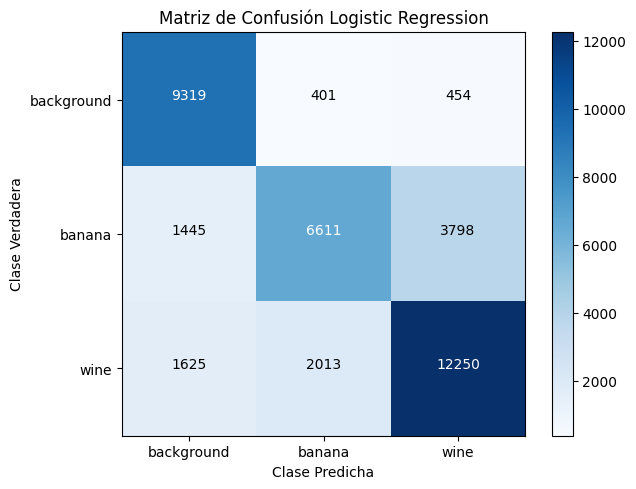

In [5]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

# Crear la matriz de confusión
cnf_matrix = confusion_matrix(y_pred=y_pred, y_true=y_test)


# Visualizar la matriz de confusión
plt.imshow(cnf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Matriz de Confusión Logistic Regression')
plt.colorbar()
tick_marks = np.arange(3)
plt.xticks(tick_marks, np.unique(y_test))
plt.yticks(tick_marks, np.unique(y_pred))
for i in range(3):
    for j in range(3):
        plt.text(j, i, cnf_matrix[i, j],
                 horizontalalignment="center",
                 color="white" if cnf_matrix[i, j] > cnf_matrix.max() / 2. else "black")
plt.tight_layout()
plt.ylabel('Clase Verdadera')
plt.xlabel('Clase Predicha')
plt.show()
